# Term Deposit Sale

# Problem Statement:
    
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

## Attribute information

# Input variables:
   - Bank client data:
   
    1. age: Continuous feature
    2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
    3. marital: marital status (married, single, divorced)
    4. education: education level (primary, secondary, tertiary)
    5. default: has credit in default?
    6. housing: has housing loan?
    7. loan: has personal loan?
    8. balance in account
    
   - Related to previous contact:
   
    9. contact: contact communication type
    10. month: last contact month of year
    11. day: last contact day of the month
    12. duration: last contact duration, in seconds*
    
   - Other attributes:
   
    13. campaign: number of contacts performed during this campaign and for this client
    14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
    15. previous: number of contacts performed before this campaign and for this client
    16. poutcome: outcome of the previous marketing campaign


- Output variable (desired target): 

    17. Target: Tell us has the client subscribed a term deposit. (Yes, No)



In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_profiling

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier

#from yellowbrick.classifier import ClassificationReport, ROCAUC

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [4]:
df = pd.read_csv('bank-full.csv')

# 1. EDA

In [4]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


### Printing the datatypes of each column and the shape of the dataset

### Univariate analysis 

In [7]:
df.skew()

age         0.68
balance     8.36
day         0.09
duration    3.14
campaign    4.90
pdays       2.62
previous   41.85
dtype: float64

In [5]:
df.shape

(45211, 17)

In [247]:
# To check if we have null values and the dtype for each
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

### Insights
There is not null values

### Printing the descriptive statistics of each & every column

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,"45,211.00",40.94,10.62,18.00,33.00,39.00,48.00,95.00
balance,"45,211.00","1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
day,"45,211.00",15.81,8.32,1.00,8.00,16.00,21.00,31.00
duration,"45,211.00",258.16,257.53,0.00,103.00,180.00,319.00,"4,918.00"
campaign,"45,211.00",2.76,3.10,1.00,1.00,2.00,3.00,63.00
pdays,"45,211.00",40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00
previous,"45,211.00",0.58,2.30,0.00,0.00,0.00,0.00,275.00


In [11]:
df.skew() # More than 3% is a value to say is a skew

age         0.68
balance     8.36
day         0.09
duration    3.14
campaign    4.90
pdays       2.62
previous   41.85
dtype: float64

In [249]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

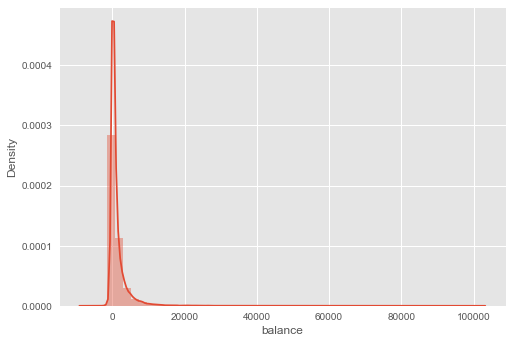

In [168]:
sns.distplot(df['balance'])
plt.show()

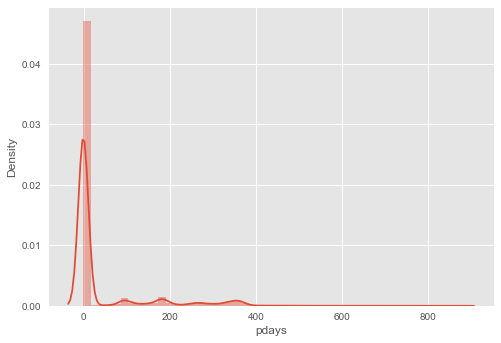

In [169]:
sns.distplot(df['pdays'])
plt.show()

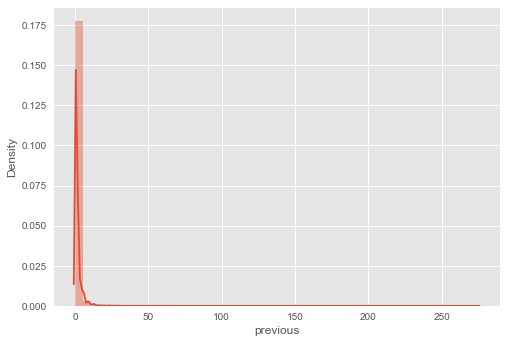

In [170]:
sns.distplot(df['previous'])
plt.show()

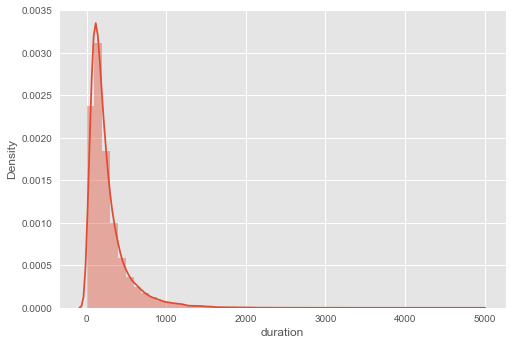

In [171]:
sns.distplot(df['duration'])
plt.show()

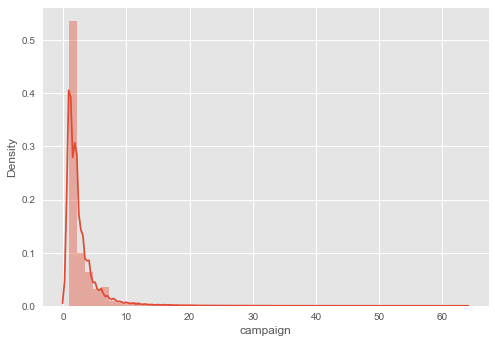

In [172]:
sns.distplot(df['campaign'])
plt.show()

# duration if an important variable and we need to see wich are 0. We need to inpugn
# We need to remove from the dataset
# In production i will not have the duration or any time variable to predict a value

In [250]:
df.groupby(df['balance'] < 0)['balance'].count()

balance
False    41445
True      3766
Name: balance, dtype: int64

### Insights
There are 3766 client with balance less than 0 or negative value.

In [251]:
df['balance'].value_counts(normalize=True)

0       0.08
1       0.00
2       0.00
4       0.00
3       0.00
        ... 
4305    0.00
6352    0.00
18881   0.00
14889   0.00
7218    0.00
Name: balance, Length: 7168, dtype: float64

In [252]:
df['pdays'].value_counts(normalize=True)

-1     0.82
 182   0.00
 92    0.00
 183   0.00
 91    0.00
       ... 
 749   0.00
 717   0.00
 589   0.00
 493   0.00
 32    0.00
Name: pdays, Length: 559, dtype: float64

### Insights
82% has not been contacted or contact period is beyond 900 days.

In [253]:
df['previous'].value_counts(normalize=True)

0     0.82
1     0.06
2     0.05
3     0.03
4     0.02
5     0.01
6     0.01
7     0.00
8     0.00
9     0.00
10    0.00
11    0.00
12    0.00
13    0.00
15    0.00
14    0.00
17    0.00
16    0.00
19    0.00
23    0.00
20    0.00
22    0.00
18    0.00
24    0.00
27    0.00
29    0.00
25    0.00
21    0.00
30    0.00
28    0.00
26    0.00
37    0.00
38    0.00
55    0.00
40    0.00
35    0.00
58    0.00
51    0.00
41    0.00
32    0.00
275   0.00
Name: previous, dtype: float64

### Insights
82% were not contacted before this campain.

In [12]:
df['campaign'].value_counts(normalize=True)

1    0.39
2    0.28
3    0.12
4    0.08
5    0.04
6    0.03
7    0.02
8    0.01
9    0.01
10   0.01
11   0.00
12   0.00
13   0.00
14   0.00
15   0.00
16   0.00
17   0.00
18   0.00
19   0.00
20   0.00
21   0.00
22   0.00
23   0.00
25   0.00
24   0.00
28   0.00
29   0.00
26   0.00
31   0.00
27   0.00
32   0.00
30   0.00
33   0.00
34   0.00
36   0.00
35   0.00
43   0.00
38   0.00
41   0.00
50   0.00
37   0.00
51   0.00
55   0.00
46   0.00
58   0.00
44   0.00
39   0.00
63   0.00
Name: campaign, dtype: float64

### Insight
The common number of contacts performed during this campaign is between 1 and 3

## Bivariate Analysis

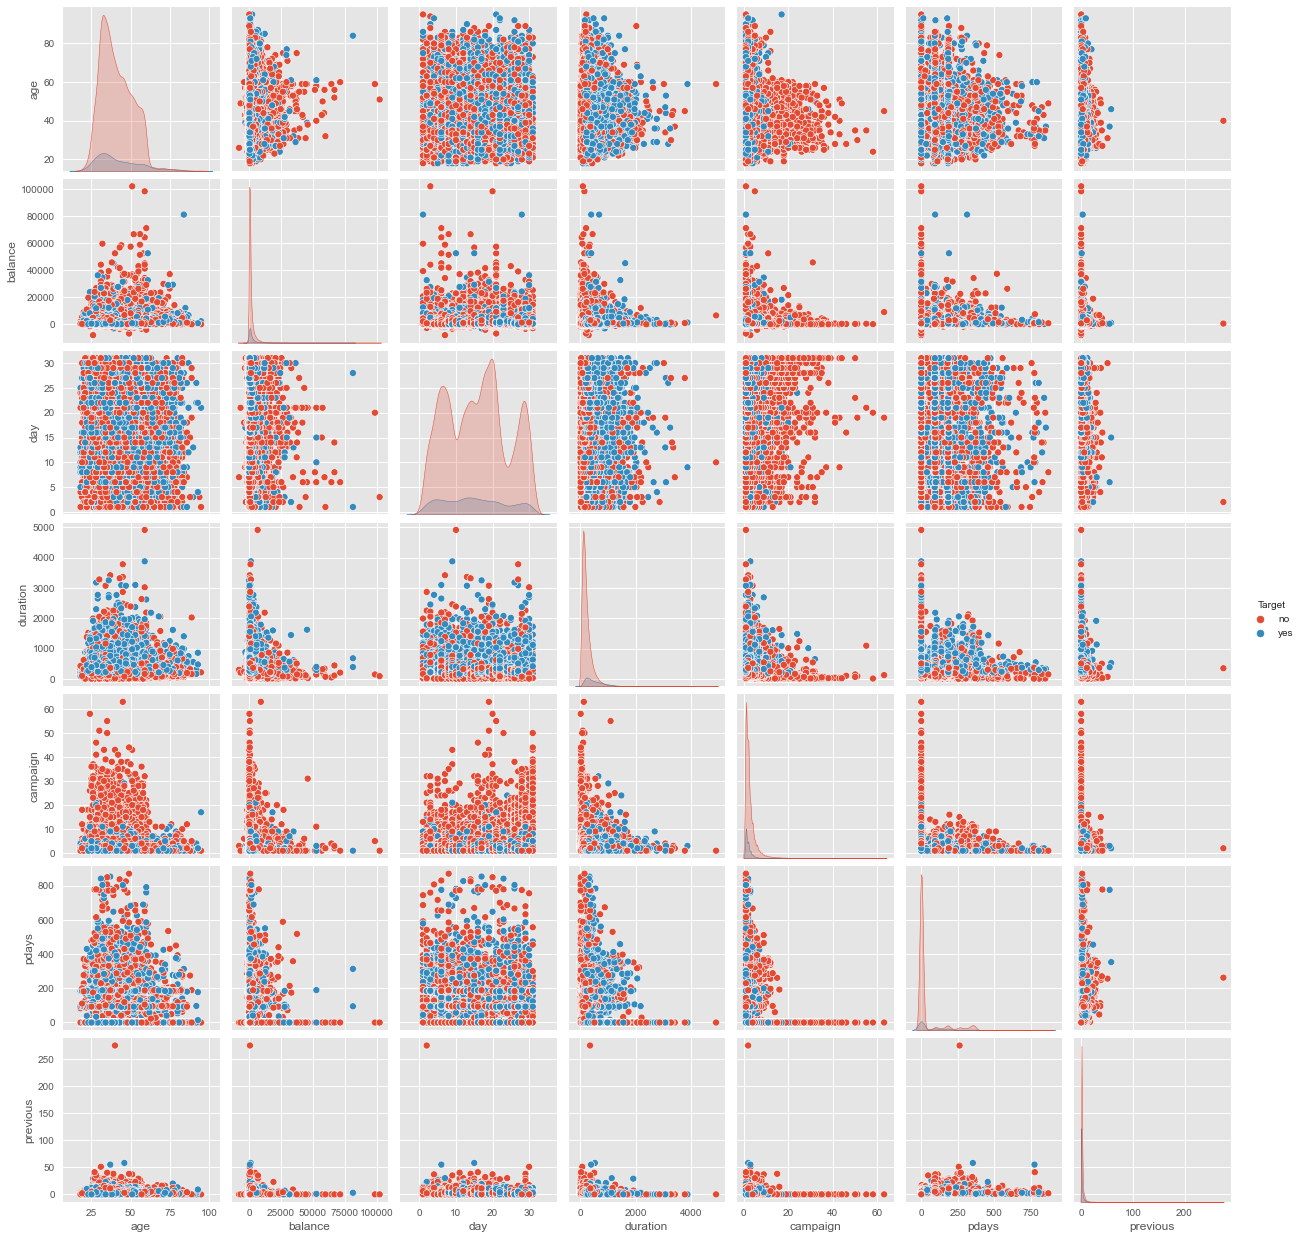

In [192]:
# We plot pairplot to see of there are 
sns.pairplot(df, hue = 'Target')

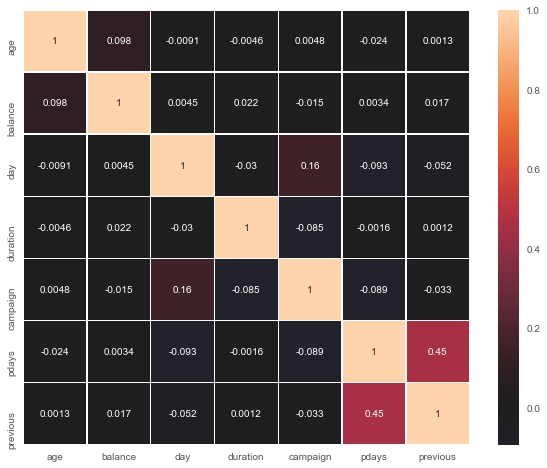

In [193]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0)
plt.show()

### Insight
There is no clear relationship between the variables.

In [194]:
df.groupby(["Target"]).mean()

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
no,40.84,"1,303.71",15.89,221.18,2.85,36.42,0.50
yes,41.67,"1,804.27",15.16,537.29,2.14,68.70,1.17


### Insight
People have similar mean age. The most contact duration (in sec) is for people who do have a term deposit. The people who have a term deposit are also contact with more days differences that the people who do not have.

In [13]:
df.groupby(["Target"]).median()

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
no,39,417,16,164,2,-1,0
yes,38,733,15,426,2,-1,0


# pd.cosstab for all variables ...

### Insight
The median show almost the same result as a the mean.

# 2. Prepare the data for analytics


In [4]:
# Converting X & Y variable to a categorical variable 
df['job'] = df['job'].astype('category')
df['marital'] = df['marital'].astype('category')
df['education'] = df['education'].astype('category')
df['default'] = df['default'].astype('category')
df['loan'] = df['loan'].astype('category')
df['housing'] = df['housing'].astype('category')
df['contact'] = df['contact'].astype('category')
df['month'] = df['month'].astype('category')
df['poutcome'] = df['poutcome'].astype('category')
df['Target'] = df['Target'].astype('category')

In [5]:
print(df.job.value_counts())
print(df.marital.value_counts())
print(df.education.value_counts())
print(df.default.value_counts())
print(df.housing.value_counts())
print(df.loan.value_counts())
print(df.contact.value_counts())
print(df.month.value_counts())
print(df.poutcome.value_counts())
print(df.Target.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

# Delete poutcome, a lot unknow

In [6]:
tv = df.Target.value_counts(normalize=True)
print(tv *100)

no    88.30
yes   11.70
Name: Target, dtype: float64


### Insight
To have an idea about the last campain an how many client subscribe term deposit. 

In [7]:
# We change categorical variable to numerical values 
values_variable = {
                "marital":{"married": 1, "single": 2 ,"divorced": 3},
                "education":{"secondary": 1, "tertiary": 2 ,"primary": 3, "unknown": -1},
                "default": {"no": 0, "yes": 1 }, 
                "housing": {"no": 0, "yes": 1 }, 
                "loan": {"no": 0, "yes": 1 }, 
                "contact": {"cellular": 1, "telephone": 2, "unknown": -1  },
                "month": {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct":10, "nov":11, "dec":12  },
                "poutcome": {"failure": 1, "other": 2, "success": 3, "unknown": -1  },
                "Target": {"no": 0, "yes": 1 } 
                }
job_columns = ["job"]

In [8]:
# We replace categorical values in the dataset and create dummies values for jobs 
df = df.replace(values_variable)
df = pd.get_dummies(df, columns=job_columns)

In [9]:
df.head(100)

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,1,2,0,2143,1,0,-1,5,5,...,0,0,1,0,0,0,0,0,0,0
1,44,2,1,0,29,1,0,-1,5,5,...,0,0,0,0,0,0,0,1,0,0
2,33,1,1,0,2,1,1,-1,5,5,...,1,0,0,0,0,0,0,0,0,0
3,47,1,-1,0,1506,1,0,-1,5,5,...,0,0,0,0,0,0,0,0,0,0
4,33,2,-1,0,1,0,0,-1,5,5,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,36,1,2,0,101,1,1,-1,5,5,...,0,0,1,0,0,0,0,0,0,0
96,55,1,1,0,383,0,0,-1,5,5,...,0,0,0,0,0,0,0,0,0,0
97,60,1,2,0,81,1,0,-1,5,5,...,0,0,0,1,0,0,0,0,0,0
98,39,1,1,0,0,1,0,-1,5,5,...,0,0,0,0,0,0,0,1,0,0


# 3. Create the ensemble model

### 3.1 Model using Logistic Regression

In [5]:
# We create a new df. Drop the actual Target to replace with dummy data
X = df.drop('Target', axis=1)

In [7]:
Y = df['Target'].astype('category')   

In [8]:
X.info()
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


AttributeError: 'Series' object has no attribute 'info'

In [12]:
X = pd.get_dummies(X, drop_first=True)

In [13]:
X.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,1,2,0,2143,1,0,-1,5,5,...,0,0,1,0,0,0,0,0,0,0
1,44,2,1,0,29,1,0,-1,5,5,...,0,0,0,0,0,0,0,1,0,0
2,33,1,1,0,2,1,1,-1,5,5,...,1,0,0,0,0,0,0,0,0,0
3,47,1,-1,0,1506,1,0,-1,5,5,...,0,0,0,0,0,0,0,0,0,0
4,33,2,-1,0,1,0,0,-1,5,5,...,0,0,0,0,0,0,0,0,0,1


In [14]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

In [15]:
logreg = LogisticRegression(random_state=1) 

In [16]:
logreg.fit(X_train, y_train)   

LogisticRegression(random_state=1)

In [17]:
#Predict the target variable (Target) on test data
y_predict = logreg.predict(X_test)

In [18]:
# We create a new df to add the new variables Observer and Predicted
Z = X_test.copy()
Z['Observer Target'] = y_test
Z['Predicted Target'] = y_predict
Z.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,Observer Target,Predicted Target
3610,42,1,3,0,2519,1,0,-1,15,5,...,0,0,0,0,0,0,0,0,0,0
11677,37,1,1,0,2209,0,0,-1,20,6,...,0,0,0,0,0,1,0,0,0,0
33018,32,1,1,0,923,1,0,1,17,4,...,0,0,0,0,0,0,0,0,0,0
44323,53,1,3,0,306,0,0,1,28,7,...,0,0,0,0,0,0,0,0,1,0
8119,32,2,2,0,257,1,0,-1,2,6,...,0,0,0,0,0,1,0,0,0,0


[[11746   267]
 [ 1247   304]]


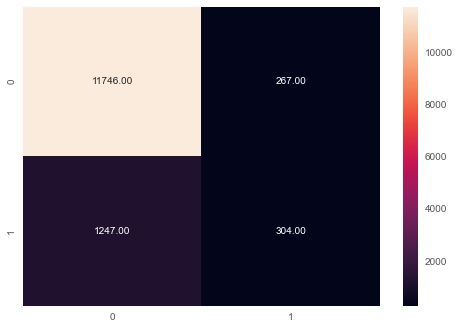

In [19]:
#Confusion matrix and his heatmap to see the performance of the model
cf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(cf_matrix, annot=True, fmt='.2f')
print(cf_matrix)

### Insight

The observed values 11746 are 0 or TN, that mean aren't taking it any suscribe term deposit and the model predicted them are true. 1247 are predicted as a FN or not taken susbcribe term deposit, but they are actually taken it.

The observerd values 257 are 1 or FP, people who are predicted to have it but are predicted false, because they don't have it. 304 are predicted as a taking and they actually are taking it or true positive.

In [20]:
tvt = y_test.value_counts(normalize=True)
print(tvt *100)

0   88.57
1   11.43
Name: Target, dtype: float64


In [21]:
#Accurancy
atrain = logreg.score(X_train, y_train)
print('Training accurancy:', atrain)
atest = logreg.score(X_test, y_test)
print('Testing accurancy:', atest)

# Recall
recall = recall_score(y_test,y_predict)
print('Recall:', recall)

#Precision
precision = precision_score(y_test,y_predict)
print("Precision:", precision)

#F1 Score
f1 = f1_score(y_test,y_predict)
print("F1 Score:", f1)

#ROC/AUC
ra = roc_auc_score(y_test,y_predict)
print("Roc Auc Score:",ra)

Training accurancy: 0.8881410560242677
Testing accurancy: 0.8883810085520495
Recall: 0.19600257898130238
Precision: 0.532399299474606
F1 Score: 0.2865221489161169
Roc Auc Score: 0.58688832853169


### Insight

The accurancy from the model for testing data is 0.88. That means our model is doing a great job to predicted people who are not taking subscribe term deposit.

The recall of the model is 0.19. That means there is a lot of false negative or predicted as a taking but they aren't taking, and we need to decrease this number. 

The precision of the model is 0.53. That means it predicts that people is taking a Personal loan it is correct 53% of the time. 

The F1 Score is 0.28. That means less precision and recall for our model as we saw previously. 

The Roc Auc Score is 0.58. The model is at least more than 50%, but still not good. We need to focus in decrease the false negative and false positive. 

In [22]:
# Feature Importance or Coefficients in our training data
fi = pd.DataFrame()
fi['Col'] = X_train.columns
# rounder values to abs
fi['Coef'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coef',ascending=False)

,Col,Coef
14,poutcome,0.29
11,campaign,0.28
5,housing,0.17
7,contact,0.16
9,month,0.14
13,previous,0.12
1,marital,0.09
2,education,0.09
16,job_blue-collar,0.07
6,loan,0.05


In [23]:
t0 = df.poutcome.value_counts(normalize=True)
print(t0 *100)

-1   81.75
 1   10.84
 2    4.07
 3    3.34
Name: poutcome, dtype: float64


In [24]:
tc = df.campaign.value_counts(normalize=True)
print(tc *100)

1    38.80
2    27.66
3    12.21
4     7.79
5     3.90
6     2.86
7     1.63
8     1.19
9     0.72
10    0.59
11    0.44
12    0.34
13    0.29
14    0.21
15    0.19
16    0.17
17    0.15
18    0.11
19    0.10
20    0.10
21    0.08
22    0.05
23    0.05
25    0.05
24    0.04
28    0.04
29    0.04
26    0.03
31    0.03
27    0.02
32    0.02
30    0.02
33    0.01
34    0.01
36    0.01
35    0.01
43    0.01
38    0.01
41    0.00
50    0.00
37    0.00
51    0.00
55    0.00
46    0.00
58    0.00
44    0.00
39    0.00
63    0.00
Name: campaign, dtype: float64


### Insight

The significant variables are poucome (outcome of the previous marketing campaign and campain) and campaing (number of contacts performed during this campaign). The number of unkwon is more that 80%, so if we want to improve the model I would suggest eliminating this value.

From the perspective of improving conversion, the days that the client is contacted could increase.

### Model using decision tree 

In [25]:
features = [col for col in df.columns if col != 'Target']

X_train, X_test, y_train, y_test = train_test_split(df[features], df['Target'], test_size=.3, random_state=1)
X_train.shape, X_test.shape

((31647, 27), (13564, 27))

In [26]:
model_entropy = DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [27]:
# printing the accuracy.
print("Train: %.2f" % model_entropy.score(X_train, y_train))  
print("Test: %.2f" % model_entropy.score(X_test, y_test))  

Train: 1.00
Test: 0.88


### Insigth
There is a high overfitting in the model, we need to regularize.

In [28]:
# we limiting the max. depth of trees and print the accuracy.
m_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=4)
m_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [29]:
print("Train: %.2f" % m_pruned.score(X_train, y_train))  
print("Test: %.2f" % m_pruned.score(X_test, y_test))  

Train: 0.90
Test: 0.90


In [30]:
y_train.value_counts()

0    27909
1     3738
Name: Target, dtype: int64

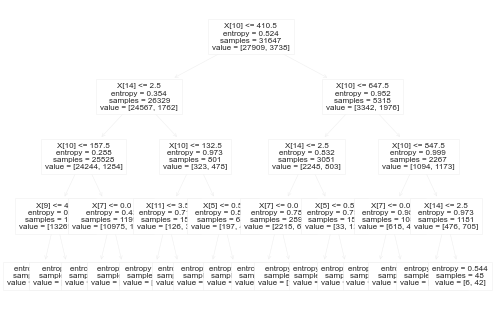

In [31]:
# Simple way to show plot
plot_tree(m_pruned, max_depth=4, fontsize=8)
#Accuracyplt.show()

In [44]:
# Acurracy
pred_train = m_pruned.predict(X_train)
pred_test = m_pruned.predict(X_test)
acc_test_TD = accuracy_score(y_test, pred_test)
acc_train_TD = accuracy_score(y_test, pred_test)
print(acc_test_TD)
print(acc_train_TD)

0.9014302565614863
0.9014302565614863


In [36]:
# Confusion matrix
pd.crosstab(y_test, pred_test, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,11701,312
1,1025,526


### Insight

The observed values 11701 are 0 or TN, that mean people aren't taking any suscribe term deposit and the model predicted them are true. 1025 are predicted as a FN or not taken susbcribe term deposit, but they are actually taken.

The observerd values 312 are 1 or FP or people who are predicred taking but actually they don't have. 526 are predicted as a taking and they actually take or true positive.

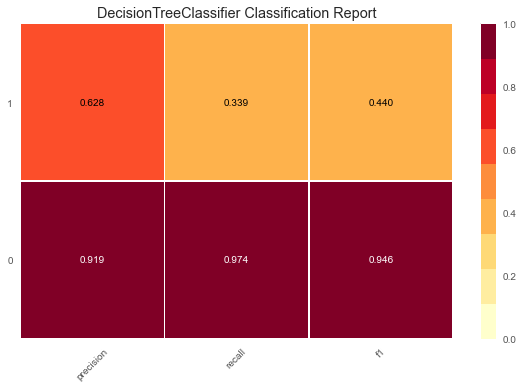

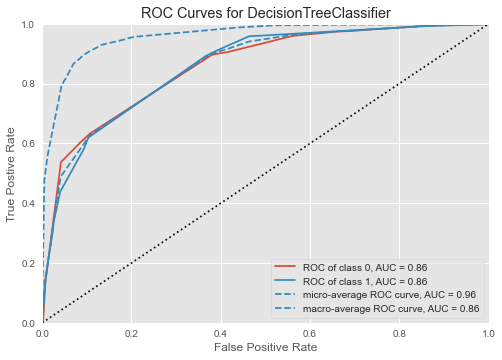

In [301]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Insight
The model is performence well as we can see in the ROC AUC value of 86%. Precision, recall and f1 are also performed similar, of course with entropy as a criteria and max_depth=4.
 

In [69]:
## Calculating feature importance
feat_importance = m_pruned.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(features, m_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration,0.60
poutcome,0.27
contact,0.10
month,0.03
housing,0.00
campaign,0.00
age,0.00
job_entrepreneur,0.00
job_unemployed,0.00
job_technician,0.00


### Insight
From the feature importance we can infer that duration, poutcome anf contact are the variables that impact people who take or not term deposit

## Model using Random forest

In [42]:
# n_estimators  nunber of tree - I take the same value as we saw in the mentoring
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [74]:
#Acuracy
pred_train_RF = rfcl.predict(X_train)
pred_test_RF = rfcl.predict(X_test)
acc_train_RF = accuracy_score(y_train, pred_train_RF)
acc_test_RF = accuracy_score(y_test, pred_test_RF)
print(acc_train_RF)
print(acc_test_RF)

0.9998420071412772
0.9054113830728399


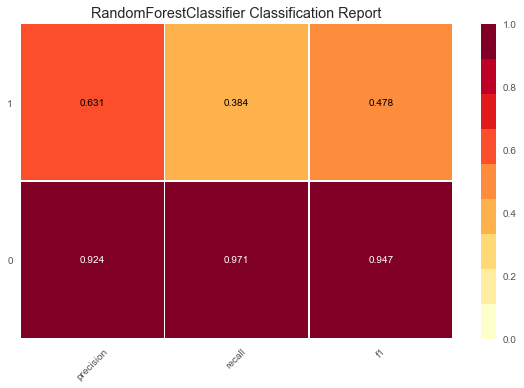

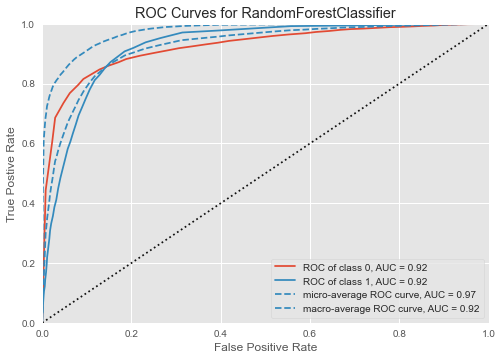

In [309]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Insigth
Compared to the decision tree, we can see that the accuracy similar to decision trees, and a litlle more better the ROC AUC with 92%. Precision, recall and F1 are also a little more better.

##  Model using Bagging Classifier 

In [60]:
# I take the same arguments for BaggingClassifier as a we already saw with in the mentoring
bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=1)
bgcl = bgcl.fit(X_train, y_train)

In [61]:
pred_train_BG = bgcl.predict(X_train)
pred_test_BG = bgcl.predict(X_test)
acc_train_BG = accuracy_score(y_train, pred_train_BG)
acc_test_BG = accuracy_score(y_test, pred_test_BG)
print(acc_train_BG)
print(acc_test_BG)

0.9939330742250451
0.9081391919787674


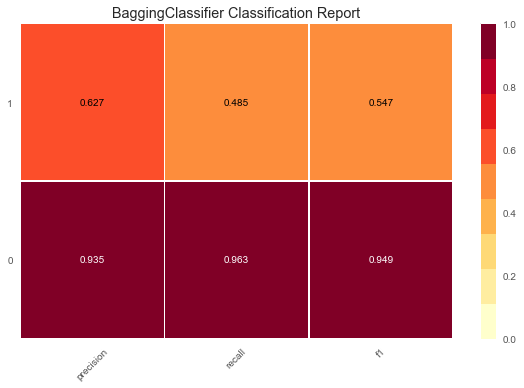

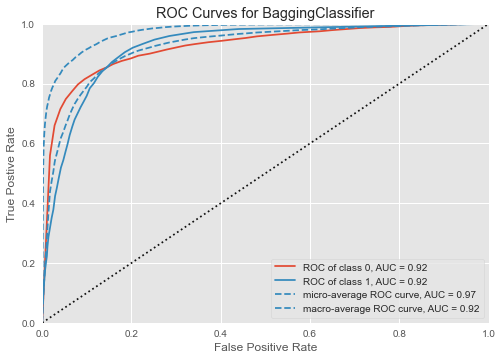

In [63]:
# I take the same arguments for BaggingClassifier as a we already saw with in the mentoring
viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=1))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=1))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Insight
There is a better improvement. The accurary is 90,8% and the ROC AUC is a litlle better with 92%

## Model using Adaboost 

In [53]:
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=1)
abcl = abcl.fit(X_train, y_train)

In [56]:
pred_train_AB =abcl.predict(X_train)
pred_test_AB =abcl.predict(X_test)
acc_train_AB = accuracy_score(y_train, pred_train_AB)
acc_test_AB = accuracy_score(y_test, pred_test_AB)
print(acc_train_AB)
print(acc_test_AB)

0.8946187632319019
0.8973016809200826


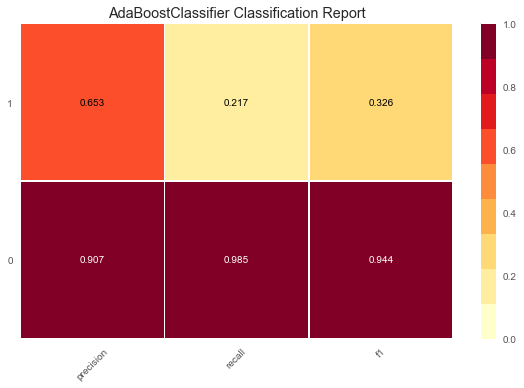

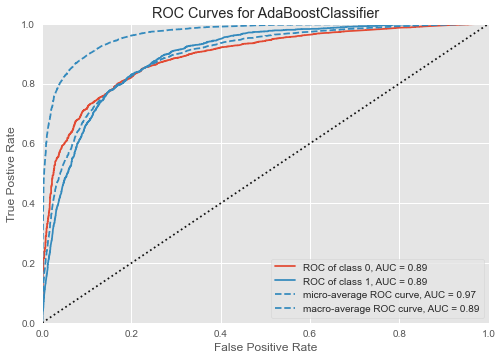

In [58]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=1))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=1))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Insigth
Compared with the previous model there is a not significant improvement. The accurary is 0.897 and the ROC AUC is a litlle better then decision threes with 89% but less as a Randon Forest

## Model using GradientBoost 

In [65]:
# I take the same arguments for GradientBoostingClassifier as a we already saw with in the mentoring
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [66]:
pred_train_GB = gbcl.predict(X_train)
pred_test_GB = gbcl.predict(X_test)
acc_train_GB = accuracy_score(y_train, pred_train_GB)
acc_test_GB = accuracy_score(y_test, pred_test_GB)
print(acc_train_GB)
print(acc_test_GB)

0.9065630233513445
0.9048215865526393


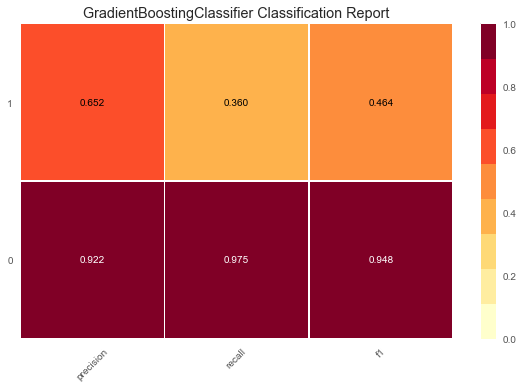

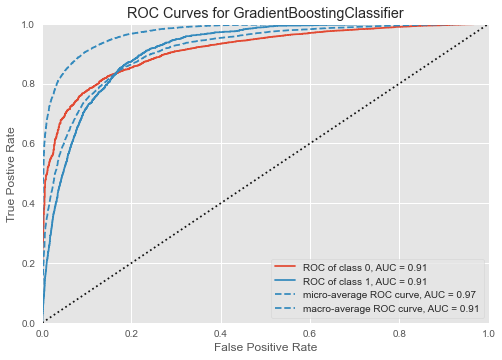

In [68]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=1))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=1))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Insight
There isn't a better improvement. The accurary is 90,4% and the ROC AUC is a litlle better with 91%.

## DataFrame to compare models

# AGREGAR LOS OTROS INDICADORES DE PERFORMANCE EN LA TABLA.

In [78]:
resultsDf = pd.DataFrame({'Method':['Decision Tree', 'Random Forest', 'Bagging', 'Adaboost', 'Gradient Boost'], 'accuracy': [acc_test_TD, acc_test_RF, acc_test_BG, acc_test_AB , acc_test_GB]})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.90
1,Random Forest,0.91
2,Bagging,0.91
3,Adaboost,0.90
4,Gradient Boost,0.90


 ### Insight
The best performance have Randon Forest and Bagging. I think they are better because Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction and Bagging because we are less concerned about individual trees overfitting the training data and we can reduce the variance from those that have high variance.